# Forecasting

## Single forecasting

In [26]:
import numpy as np
from rcpy.data import load_data_rcpy, preprocess_data_rcpy, denormalize_data_rcpy # Because I exposed the function in __init__.py
#from rcpy.data import ClimateIndex, load_NOAA_data

system = 'ENSO'

data_file = '../../master-thesis/DATA/data_enso/ts_nino_1870_2024.csv'
#data_file = '../../master-thesis/DATA/data_generated/ts_lorenz_50000.csv'

data_raw = load_data_rcpy(data_file=data_file)

init_transient = 10
transient_length = 50
warmup_length = int(data_raw.shape[0] * 0.2)
train_length = int(data_raw.shape[0] * 0.8)
forecast_length = 300

data = preprocess_data_rcpy(
    data=data_raw,
    init_transient=init_transient,
    transient_length=transient_length,
    warmup_length=warmup_length,
    train_length=train_length,
    normalize=True
)

In [27]:
#from reservoirpy.nodes import Reservoir, Ridge
from rcpy.models import create_model


reservoir_units = 1000
leak_rate = 1
spectral_radius = 0.99
input_scaling = 0.35
alpha = 1e-7
p = 0.1

seed = np.random.randint(0, 10000)  # Random seed for reproducibility

model_config = {
    "reservoir_units": reservoir_units,
    "p": p,
    "leak_rate": leak_rate,
    "spectral_radius": spectral_radius,
    "input_scaling": input_scaling,
    "alpha": alpha,
    "seed": seed
}

esn_model = create_model(model_config=model_config)

esn_model.fit(data["train_data"], data["train_target"], warmup=warmup_length)


Running Model-43: 1488it [00:00, 8914.38it/s]<?, ?it/s]
Running Model-43: 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]


Fitting node Ridge-43...


'Model-43': Model('Reservoir-43', 'Ridge-43')

In [28]:
from rcpy.forecasting import forecast_rcpy

Y_pred = forecast_rcpy(
    model=esn_model,
    warmup_data=data['warmup_data'],
    forecast_length=forecast_length,
)

Y_pred_denorm = denormalize_data_rcpy(Y_pred, data["train_min"], data["train_max"])
data_denorm = denormalize_data_rcpy(data["val_data"], data["train_min"], data["train_max"])

Running Model-43: 372it [00:00, 6927.84it/s]           


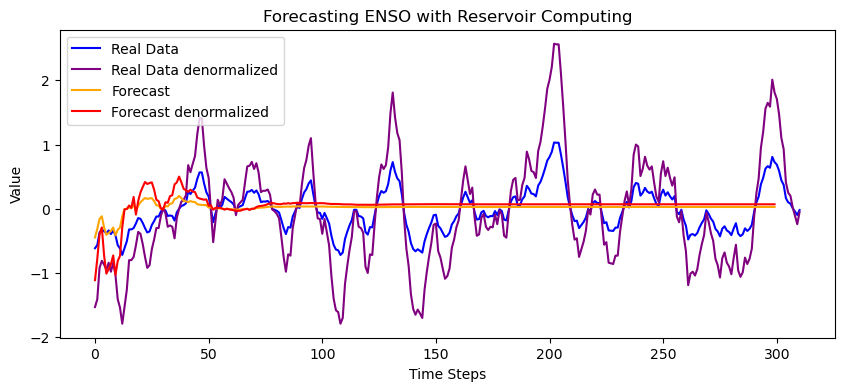

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(data['val_data'], label='Real Data', color='blue')
plt.plot(data_denorm, label='Real Data denormalized', color='purple')

plt.plot(Y_pred, label='Forecast', color='orange')
plt.plot(Y_pred_denorm, label='Forecast denormalized', color='red')
plt.legend()
plt.title(f'Forecasting {system} with Reservoir Computing')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.show()


## Multiple forecasts

In [1]:
import numpy as np
from rcpy.data import load_data_rcpy, preprocess_data_rcpy, denormalize_data_rcpy # Because I exposed the function in __init__.py
#from rcpy.data import ClimateIndex, load_NOAA_data

system = 'enso' # 'enso', 'mackeyglass', 'mackeyglass_noisy', 'random'
data_file = '../../master-thesis/DATA/data_enso/ts_nino_1870_2024.csv'

data_raw = load_data_rcpy(data_file=data_file)

init_transient = 10
transient_length = 50
warmup_length = int(data_raw.shape[0] * 0.2)
train_length = int(data_raw.shape[0] * 0.8)
forecast_length = 100

data = preprocess_data_rcpy(
    data=data_raw,
    init_transient=init_transient,
    transient_length=transient_length,
    warmup_length=warmup_length,
    train_length=train_length,
    normalize=True
)

In [2]:
reservoir_units = 200
leak_rate = 0.5056047881730025
spectral_radius = 1.5901354007553508
input_scaling = 0.3397786073232813
alpha = 0.00030433314562115516
p = 0.4244895661442022

model_config = {
    "reservoir_units": reservoir_units,
    "p": p,
    "leak_rate": leak_rate,
    "spectral_radius": spectral_radius,
    "input_scaling": input_scaling,
    "alpha": alpha,
    "seed": None
}

In [3]:
import time
from rcpy.forecasting import multiple_forecasts_rcpy

num_realizations = 100

start_time = time.time()

Y_preds = multiple_forecasts_rcpy(
    model_config=model_config,
    data=data,
    forecast_length=forecast_length,
    num_realizations=num_realizations,
)

end_time = time.time()
print(f"Cell execution time: {end_time - start_time:.2f} seconds")

Running Model-0: 1488it [00:00, 13760.06it/s]?, ?it/s]
Running Model-0: 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]


Fitting node Ridge-0...


Running Model-0: 372it [00:00, 7167.44it/s]           
Running Model-1: 1488it [00:00, 12414.42it/s]?, ?it/s]
Running Model-1: 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]


Fitting node Ridge-1...


Running Model-1: 372it [00:00, 9916.24it/s]           
Running Model-2: 1488it [00:00, 9694.71it/s] ?, ?it/s]
Running Model-2: 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]


Fitting node Ridge-2...


Running Model-2: 372it [00:00, 7695.67it/s]           
Running Model-3: 1488it [00:00, 13974.66it/s]?, ?it/s]
Running Model-3: 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]


Fitting node Ridge-3...


Running Model-3: 372it [00:00, 6360.06it/s]           
Running Model-4: 1488it [00:00, 13419.87it/s]?, ?it/s]
Running Model-4: 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]


Fitting node Ridge-4...


Running Model-4: 372it [00:00, 10508.92it/s]          
Running Model-5: 1488it [00:00, 13774.70it/s]?, ?it/s]
Running Model-5: 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]


Fitting node Ridge-5...


Running Model-5: 372it [00:00, 8186.37it/s]           
Running Model-6: 1488it [00:00, 13954.85it/s]?, ?it/s]
Running Model-6: 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]


Fitting node Ridge-6...


Running Model-6: 372it [00:00, 7517.00it/s]           
Running Model-7: 1488it [00:00, 12552.49it/s]?, ?it/s]
Running Model-7: 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]


Fitting node Ridge-7...


Running Model-7: 372it [00:00, 6532.80it/s]           
Running Model-8: 1488it [00:00, 14098.50it/s]?, ?it/s]
Running Model-8: 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]


Fitting node Ridge-8...


Running Model-8: 372it [00:00, 11883.06it/s]          
Running Model-9: 1488it [00:00, 12915.59it/s]?, ?it/s]
Running Model-9: 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]


Fitting node Ridge-9...


Running Model-9: 372it [00:00, 7862.10it/s]           
Running Model-10: 1488it [00:00, 13809.05it/s]?, ?it/s]
Running Model-10: 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]


Fitting node Ridge-10...


Running Model-10: 372it [00:00, 10944.04it/s]          
Running Model-11: 1488it [00:00, 13765.31it/s]?, ?it/s]
Running Model-11: 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]


Fitting node Ridge-11...


Running Model-11: 372it [00:00, 7804.25it/s]           
Running Model-12: 1488it [00:00, 14026.86it/s]?, ?it/s]
Running Model-12: 100%|██████████| 1/1 [00:00<00:00,  9.05it/s]


Fitting node Ridge-12...


Running Model-12: 372it [00:00, 6257.29it/s]           
Running Model-13: 1488it [00:00, 13189.83it/s]?, ?it/s]
Running Model-13: 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]


Fitting node Ridge-13...


Running Model-13: 372it [00:00, 8030.43it/s]           
Running Model-14: 1488it [00:00, 14011.46it/s]?, ?it/s]
Running Model-14: 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]


Fitting node Ridge-14...


Running Model-14: 372it [00:00, 7459.71it/s]           
Running Model-15: 1488it [00:00, 13729.91it/s]?, ?it/s]
Running Model-15: 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]


Fitting node Ridge-15...


Running Model-15: 372it [00:00, 7093.25it/s]           
Running Model-16: 1488it [00:00, 13679.24it/s]?, ?it/s]
Running Model-16: 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]


Fitting node Ridge-16...


Running Model-16: 372it [00:00, 7486.34it/s]           
Running Model-17: 1488it [00:00, 12603.98it/s]?, ?it/s]
Running Model-17: 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]


Fitting node Ridge-17...


Running Model-17: 372it [00:00, 7808.86it/s]           
Running Model-18: 1488it [00:00, 13322.19it/s]?, ?it/s]
Running Model-18: 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]


Fitting node Ridge-18...


Running Model-18: 372it [00:00, 7580.58it/s]           
Running Model-19: 1488it [00:00, 13052.51it/s]?, ?it/s]
Running Model-19: 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]


Fitting node Ridge-19...


Running Model-19: 372it [00:00, 6839.98it/s]           
Running Model-20: 1488it [00:00, 13056.34it/s]?, ?it/s]
Running Model-20: 100%|██████████| 1/1 [00:00<00:00,  8.40it/s]


Fitting node Ridge-20...


Running Model-20: 372it [00:00, 7496.56it/s]           
Running Model-21: 1488it [00:00, 13861.74it/s]?, ?it/s]
Running Model-21: 100%|██████████| 1/1 [00:00<00:00,  8.98it/s]


Fitting node Ridge-21...


Running Model-21: 372it [00:00, 6537.13it/s]           
Running Model-22: 1488it [00:00, 12718.30it/s]?, ?it/s]
Running Model-22: 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]


Fitting node Ridge-22...


Running Model-22: 372it [00:00, 12592.05it/s]          
Running Model-23: 1488it [00:00, 14399.58it/s]?, ?it/s]
Running Model-23: 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]


Fitting node Ridge-23...


Running Model-23: 372it [00:00, 7662.75it/s]           
Running Model-24: 1488it [00:00, 14167.95it/s]?, ?it/s]
Running Model-24: 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]


Fitting node Ridge-24...


Running Model-24: 372it [00:00, 7717.52it/s]           
Running Model-25: 1488it [00:00, 14031.78it/s]?, ?it/s]
Running Model-25: 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]


Fitting node Ridge-25...


Running Model-25: 372it [00:00, 7834.94it/s]           
Running Model-26: 1488it [00:00, 13234.41it/s]?, ?it/s]
Running Model-26: 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]


Fitting node Ridge-26...


Running Model-26: 372it [00:00, 7583.83it/s]           
Running Model-27: 1488it [00:00, 14007.72it/s]?, ?it/s]
Running Model-27: 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]


Fitting node Ridge-27...


Running Model-27: 372it [00:00, 7443.56it/s]           
Running Model-28: 1488it [00:00, 13886.04it/s]?, ?it/s]
Running Model-28: 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]


Fitting node Ridge-28...


Running Model-28: 372it [00:00, 6731.36it/s]           
Running Model-29: 1488it [00:00, 14060.83it/s]?, ?it/s]
Running Model-29: 100%|██████████| 1/1 [00:00<00:00,  9.08it/s]


Fitting node Ridge-29...


Running Model-29: 372it [00:00, 6572.84it/s]           
Running Model-30: 1488it [00:00, 14220.51it/s]?, ?it/s]
Running Model-30: 100%|██████████| 1/1 [00:00<00:00,  9.23it/s]


Fitting node Ridge-30...


Running Model-30: 372it [00:00, 6537.43it/s]           
Running Model-31: 1488it [00:00, 14135.03it/s]?, ?it/s]
Running Model-31: 100%|██████████| 1/1 [00:00<00:00,  9.10it/s]


Fitting node Ridge-31...


Running Model-31: 372it [00:00, 7835.29it/s]           
Running Model-32: 1488it [00:00, 13881.72it/s]?, ?it/s]
Running Model-32: 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]


Fitting node Ridge-32...


Running Model-32: 372it [00:00, 6937.82it/s]           
Running Model-33: 1488it [00:00, 14001.53it/s]?, ?it/s]
Running Model-33: 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]


Fitting node Ridge-33...


Running Model-33: 372it [00:00, 7721.83it/s]           
Running Model-34: 1488it [00:00, 13528.99it/s]?, ?it/s]
Running Model-34: 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]


Fitting node Ridge-34...


Running Model-34: 372it [00:00, 8055.89it/s]           
Running Model-35: 1488it [00:00, 14048.33it/s]?, ?it/s]
Running Model-35: 100%|██████████| 1/1 [00:00<00:00,  9.11it/s]


Fitting node Ridge-35...


Running Model-35: 372it [00:00, 7015.68it/s]           
Running Model-36: 1488it [00:00, 14201.84it/s]?, ?it/s]
Running Model-36: 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]


Fitting node Ridge-36...


Running Model-36: 372it [00:00, 12048.41it/s]          
Running Model-37: 1488it [00:00, 13824.99it/s]?, ?it/s]
Running Model-37: 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]


Fitting node Ridge-37...


Running Model-37: 372it [00:00, 11828.73it/s]          
Running Model-38: 1488it [00:00, 13222.83it/s]?, ?it/s]
Running Model-38: 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]


Fitting node Ridge-38...


Running Model-38: 372it [00:00, 12565.58it/s]          
Running Model-39: 1488it [00:00, 13383.44it/s]?, ?it/s]
Running Model-39: 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]


Fitting node Ridge-39...


Running Model-39: 372it [00:00, 7004.57it/s]           
Running Model-40: 1488it [00:00, 13915.92it/s]?, ?it/s]
Running Model-40: 100%|██████████| 1/1 [00:00<00:00,  9.05it/s]


Fitting node Ridge-40...


Running Model-40: 372it [00:00, 7522.73it/s]           
Running Model-41: 1488it [00:00, 11379.46it/s]?, ?it/s]
Running Model-41: 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Fitting node Ridge-41...


Running Model-41: 372it [00:00, 6739.00it/s]           
Running Model-42: 1488it [00:00, 12550.32it/s]?, ?it/s]
Running Model-42: 100%|██████████| 1/1 [00:00<00:00,  8.18it/s]


Fitting node Ridge-42...


Running Model-42: 372it [00:00, 7633.54it/s]           
Running Model-43: 1488it [00:00, 13975.10it/s]?, ?it/s]
Running Model-43: 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]


Fitting node Ridge-43...


Running Model-43: 372it [00:00, 11894.83it/s]          
Running Model-44: 1488it [00:00, 13574.57it/s]?, ?it/s]
Running Model-44: 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]


Fitting node Ridge-44...


Running Model-44: 372it [00:00, 5849.03it/s]           
Running Model-45: 1488it [00:00, 13739.31it/s]?, ?it/s]
Running Model-45: 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]


Fitting node Ridge-45...


Running Model-45: 372it [00:00, 11103.39it/s]          
Running Model-46: 1488it [00:00, 13728.34it/s]?, ?it/s]
Running Model-46: 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]


Fitting node Ridge-46...


Running Model-46: 372it [00:00, 6133.54it/s]           
Running Model-47: 1488it [00:00, 11129.88it/s]?, ?it/s]
Running Model-47: 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Fitting node Ridge-47...


Running Model-47: 372it [00:00, 10162.38it/s]          
Running Model-48: 1488it [00:00, 11757.47it/s]?, ?it/s]
Running Model-48: 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]


Fitting node Ridge-48...


Running Model-48: 372it [00:00, 6224.19it/s]           
Running Model-49: 1488it [00:00, 14143.93it/s]?, ?it/s]
Running Model-49: 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]


Fitting node Ridge-49...


Running Model-49: 372it [00:00, 7638.63it/s]           
Running Model-50: 1488it [00:00, 12153.07it/s]?, ?it/s]
Running Model-50: 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]


Fitting node Ridge-50...


Running Model-50: 372it [00:00, 6994.27it/s]           
Running Model-51: 1488it [00:00, 12622.36it/s]?, ?it/s]
Running Model-51: 100%|██████████| 1/1 [00:00<00:00,  8.17it/s]


Fitting node Ridge-51...


Running Model-51: 372it [00:00, 7419.03it/s]           
Running Model-52: 1488it [00:00, 14015.24it/s]?, ?it/s]
Running Model-52: 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]


Fitting node Ridge-52...


Running Model-52: 372it [00:00, 6721.64it/s]           
Running Model-53: 1488it [00:00, 13811.10it/s]?, ?it/s]
Running Model-53: 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]


Fitting node Ridge-53...


Running Model-53: 372it [00:00, 7236.46it/s]           
Running Model-54: 1488it [00:00, 13201.58it/s]?, ?it/s]
Running Model-54: 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]


Fitting node Ridge-54...


Running Model-54: 372it [00:00, 6226.16it/s]           
Running Model-55: 1488it [00:00, 13117.81it/s]?, ?it/s]
Running Model-55: 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]


Fitting node Ridge-55...


Running Model-55: 372it [00:00, 7579.07it/s]           
Running Model-56: 1488it [00:00, 13878.48it/s]?, ?it/s]
Running Model-56: 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]


Fitting node Ridge-56...


Running Model-56: 372it [00:00, 7666.25it/s]           
Running Model-57: 1488it [00:00, 13402.98it/s]?, ?it/s]
Running Model-57: 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]


Fitting node Ridge-57...


Running Model-57: 372it [00:00, 7540.69it/s]           
Running Model-58: 1488it [00:00, 14427.94it/s]?, ?it/s]
Running Model-58: 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]


Fitting node Ridge-58...


Running Model-58: 372it [00:00, 7475.01it/s]           
Running Model-59: 1488it [00:00, 13806.30it/s]?, ?it/s]
Running Model-59: 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]


Fitting node Ridge-59...


Running Model-59: 372it [00:00, 7848.89it/s]           
Running Model-60: 1488it [00:00, 14355.23it/s]?, ?it/s]
Running Model-60: 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]


Fitting node Ridge-60...


Running Model-60: 372it [00:00, 7504.63it/s]           
Running Model-61: 1488it [00:00, 13464.08it/s]?, ?it/s]
Running Model-61: 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]


Fitting node Ridge-61...


Running Model-61: 372it [00:00, 6310.90it/s]           
Running Model-62: 1488it [00:00, 13511.65it/s]?, ?it/s]
Running Model-62: 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]


Fitting node Ridge-62...


Running Model-62: 372it [00:00, 7852.33it/s]           
Running Model-63: 1488it [00:00, 12470.75it/s]?, ?it/s]
Running Model-63: 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]


Fitting node Ridge-63...


Running Model-63: 372it [00:00, 7353.92it/s]           
Running Model-64: 1488it [00:00, 14001.40it/s]?, ?it/s]
Running Model-64: 100%|██████████| 1/1 [00:00<00:00,  9.08it/s]


Fitting node Ridge-64...


Running Model-64: 372it [00:00, 7811.91it/s]           
Running Model-65: 1488it [00:00, 13658.04it/s]?, ?it/s]
Running Model-65: 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]


Fitting node Ridge-65...


Running Model-65: 372it [00:00, 7099.32it/s]           
Running Model-66: 1488it [00:00, 14167.66it/s]?, ?it/s]
Running Model-66: 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]


Fitting node Ridge-66...


Running Model-66: 372it [00:00, 7788.17it/s]           
Running Model-67: 1488it [00:00, 13607.21it/s]?, ?it/s]
Running Model-67: 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]


Fitting node Ridge-67...


Running Model-67: 372it [00:00, 7948.74it/s]           
Running Model-68: 1488it [00:00, 11736.05it/s]?, ?it/s]
Running Model-68: 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]


Fitting node Ridge-68...


Running Model-68: 372it [00:00, 6608.78it/s]           
Running Model-69: 1488it [00:00, 12493.47it/s]?, ?it/s]
Running Model-69: 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]


Fitting node Ridge-69...


Running Model-69: 372it [00:00, 11246.16it/s]          
Running Model-70: 1488it [00:00, 13634.59it/s]?, ?it/s]
Running Model-70: 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]


Fitting node Ridge-70...


Running Model-70: 372it [00:00, 6929.22it/s]           
Running Model-71: 1488it [00:00, 13617.54it/s]?, ?it/s]
Running Model-71: 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]


Fitting node Ridge-71...


Running Model-71: 372it [00:00, 7816.69it/s]           
Running Model-72: 1488it [00:00, 13448.06it/s]?, ?it/s]
Running Model-72: 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]


Fitting node Ridge-72...


Running Model-72: 372it [00:00, 6529.71it/s]           
Running Model-73: 1488it [00:00, 13880.83it/s]?, ?it/s]
Running Model-73: 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]


Fitting node Ridge-73...


Running Model-73: 372it [00:00, 7574.55it/s]           
Running Model-74: 1488it [00:00, 12308.96it/s]?, ?it/s]
Running Model-74: 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]


Fitting node Ridge-74...


Running Model-74: 372it [00:00, 8503.68it/s]           
Running Model-75: 1488it [00:00, 11192.17it/s]?, ?it/s]
Running Model-75: 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Fitting node Ridge-75...


Running Model-75: 372it [00:00, 5858.69it/s]           
Running Model-76: 1488it [00:00, 12473.54it/s]?, ?it/s]
Running Model-76: 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]


Fitting node Ridge-76...


Running Model-76: 372it [00:00, 6933.23it/s]           
Running Model-77: 1488it [00:00, 14027.96it/s]?, ?it/s]
Running Model-77: 100%|██████████| 1/1 [00:00<00:00,  9.09it/s]


Fitting node Ridge-77...


Running Model-77: 372it [00:00, 6548.15it/s]           
Running Model-78: 1488it [00:00, 13602.35it/s]?, ?it/s]
Running Model-78: 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]


Fitting node Ridge-78...


Running Model-78: 372it [00:00, 8384.78it/s]           
Running Model-79: 1488it [00:00, 13364.41it/s]?, ?it/s]
Running Model-79: 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]


Fitting node Ridge-79...


Running Model-79: 372it [00:00, 6991.29it/s]           
Running Model-80: 1488it [00:00, 14337.06it/s]?, ?it/s]
Running Model-80: 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]


Fitting node Ridge-80...


Running Model-80: 372it [00:00, 6906.16it/s]           
Running Model-81: 1488it [00:00, 13551.87it/s]?, ?it/s]
Running Model-81: 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]


Fitting node Ridge-81...


Running Model-81: 372it [00:00, 6268.25it/s]           
Running Model-82: 1488it [00:00, 13482.78it/s]?, ?it/s]
Running Model-82: 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]


Fitting node Ridge-82...


Running Model-82: 372it [00:00, 12063.03it/s]          
Running Model-83: 1488it [00:00, 13439.55it/s]?, ?it/s]
Running Model-83: 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]


Fitting node Ridge-83...


Running Model-83: 372it [00:00, 6680.57it/s]           
Running Model-84: 1488it [00:00, 11875.80it/s]?, ?it/s]
Running Model-84: 100%|██████████| 1/1 [00:00<00:00,  7.70it/s]


Fitting node Ridge-84...


Running Model-84: 372it [00:00, 11641.63it/s]          
Running Model-85: 1488it [00:00, 12999.85it/s]?, ?it/s]
Running Model-85: 100%|██████████| 1/1 [00:00<00:00,  8.45it/s]


Fitting node Ridge-85...


Running Model-85: 372it [00:00, 12253.84it/s]          
Running Model-86: 1488it [00:00, 13565.42it/s]?, ?it/s]
Running Model-86: 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]


Fitting node Ridge-86...


Running Model-86: 372it [00:00, 7443.27it/s]           
Running Model-87: 1488it [00:00, 11749.13it/s]?, ?it/s]
Running Model-87: 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Fitting node Ridge-87...


Running Model-87: 372it [00:00, 11081.38it/s]          
Running Model-88: 1488it [00:00, 13428.15it/s]?, ?it/s]
Running Model-88: 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]


Fitting node Ridge-88...


Running Model-88: 372it [00:00, 11355.26it/s]          
Running Model-89: 1488it [00:00, 13878.11it/s]?, ?it/s]
Running Model-89: 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]


Fitting node Ridge-89...


Running Model-89: 372it [00:00, 7473.83it/s]           
Running Model-90: 1488it [00:00, 13173.93it/s]?, ?it/s]
Running Model-90: 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]


Fitting node Ridge-90...


Running Model-90: 372it [00:00, 7969.40it/s]           
Running Model-91: 1488it [00:00, 13312.33it/s]?, ?it/s]
Running Model-91: 100%|██████████| 1/1 [00:00<00:00,  8.28it/s]


Fitting node Ridge-91...


Running Model-91: 372it [00:00, 6173.63it/s]           
Running Model-92: 1488it [00:00, 13709.25it/s]?, ?it/s]
Running Model-92: 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]


Fitting node Ridge-92...


Running Model-92: 372it [00:00, 7608.46it/s]           
Running Model-93: 1488it [00:00, 13873.11it/s]?, ?it/s]
Running Model-93: 100%|██████████| 1/1 [00:00<00:00,  9.02it/s]


Fitting node Ridge-93...


Running Model-93: 372it [00:00, 6880.30it/s]           
Running Model-94: 1488it [00:00, 13841.94it/s]?, ?it/s]
Running Model-94: 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]


Fitting node Ridge-94...


Running Model-94: 372it [00:00, 7354.72it/s]           
Running Model-95: 1488it [00:00, 13552.11it/s]?, ?it/s]
Running Model-95: 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]


Fitting node Ridge-95...


Running Model-95: 372it [00:00, 7819.19it/s]           
Running Model-96: 1488it [00:00, 14068.09it/s]?, ?it/s]
Running Model-96: 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]


Fitting node Ridge-96...


Running Model-96: 372it [00:00, 7889.25it/s]           
Running Model-97: 1488it [00:00, 13275.68it/s]?, ?it/s]
Running Model-97: 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]


Fitting node Ridge-97...


Running Model-97: 372it [00:00, 7820.57it/s]           
Running Model-98: 1488it [00:00, 12692.05it/s]?, ?it/s]
Running Model-98: 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]


Fitting node Ridge-98...


Running Model-98: 372it [00:00, 7682.48it/s]           
Running Model-99: 1488it [00:00, 13093.53it/s]?, ?it/s]
Running Model-99: 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]


Fitting node Ridge-99...


Running Model-99: 372it [00:00, 11609.49it/s]          


Cell execution time: 27.45 seconds


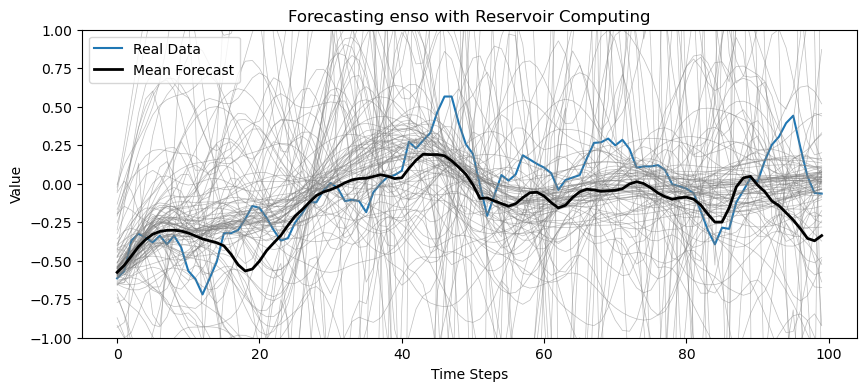

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(data['val_data'][:forecast_length], label='Real Data', color='tab:blue')
for i in range(num_realizations):
    plt.plot(Y_preds[i], color='tab:gray', alpha=0.5, lw=0.5)
mean_pred = np.mean([Y_preds[i].flatten() for i in range(num_realizations)], axis=0)
plt.plot(mean_pred, label='Mean Forecast', color='black', linewidth=2)
plt.legend()
plt.ylim([-1, 1])  # Adjust y-axis limits based on your data range
plt.title(f'Forecasting {system} with Reservoir Computing')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.show()